In [9]:

from numpy.random import seed
seed(8)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
%matplotlib inline


In [10]:

def read_in_and_split_data():
    
    iris_data = datasets.load_iris()
    data = iris_data["data"]
    targets = iris_data["target"]
    train_data, test_data, train_targets,test_targets = train_test_split(data, targets, test_size=0.1)
    return (train_data, test_data, train_targets,test_targets)
    

In [11]:
train_data, test_data, train_targets, test_targets = read_in_and_split_data()

In [12]:
train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

In [13]:

def model(input_shape, dropout_rate, weight_decay):

    model = Sequential([
        Dense(64, activation="relu",
            kernel_regularizer=regularizers.l2(weight_decay),
            kernel_initializer="he_uniform",
            bias_initializer="ones",
            input_shape=input_shape),
        
        Dense(128,kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        Dense(128,kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        
        Dropout(dropout_rate),
        
        Dense(128,kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        Dense(128,kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        
        BatchNormalization(),
        
        Dense(64,kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        Dense(64,kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        
        Dropout(dropout_rate),
        
        Dense(64,kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        Dense(64,kernel_regularizer=regularizers.l2(weight_decay), activation="relu"),
        Dense(3, activation="softmax"),
    ])
    
    return model


In [14]:
def callbacks():
    earlyStoping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",mode='min',patience=30)
    ReduceLROnPlateau = tf.keras.callbacks.ReduceLROnPlateau(patience=20,factor=0.2)
    
    return (earlyStoping, ReduceLROnPlateau)

In [15]:
def compile_model(model):

    adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
    loss = tf.keras.losses.CategoricalCrossentropy()
    model.compile(optimizer=adam, loss=loss, metrics=["accuracy"])

In [16]:

history = model(train_data[0].shape, 0.3, 0.0001)
compile_model(history)
early_stopping, learning_rate_reduction = callbacks()
call_history = history.fit(train_data, train_targets, epochs=800, validation_split=0.15, callbacks=[early_stopping, learning_rate_reduction], verbose=2)

/home/hirokrr/anaconda3/envs/data/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1739190093.685410   39096 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1768 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/800


I0000 00:00:1739190098.086018   40012 service.cc:148] XLA service 0x7f6608013c70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739190098.086890   40012 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-02-10 18:21:38.186534: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739190098.639833   40012 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-10 18:21:42.442455: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1906', 68 bytes spill stores, 72 bytes spill loads

I0000 00:00:1739190105.752248   40012 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-02-10 18:21:48.765497: I e

4/4 - 18s - 4s/step - accuracy: 0.2807 - loss: 1.2928 - val_accuracy: 0.4762 - val_loss: 1.1672 - learning_rate: 1.0000e-04
Epoch 2/800
4/4 - 0s - 24ms/step - accuracy: 0.3246 - loss: 1.2187 - val_accuracy: 0.6190 - val_loss: 1.1598 - learning_rate: 1.0000e-04
Epoch 3/800
4/4 - 0s - 19ms/step - accuracy: 0.3860 - loss: 1.2112 - val_accuracy: 0.6190 - val_loss: 1.1554 - learning_rate: 1.0000e-04
Epoch 4/800
4/4 - 0s - 19ms/step - accuracy: 0.3246 - loss: 1.2181 - val_accuracy: 0.6190 - val_loss: 1.1502 - learning_rate: 1.0000e-04
Epoch 5/800
4/4 - 0s - 21ms/step - accuracy: 0.4035 - loss: 1.2173 - val_accuracy: 0.6190 - val_loss: 1.1469 - learning_rate: 1.0000e-04
Epoch 6/800
4/4 - 0s - 20ms/step - accuracy: 0.4035 - loss: 1.1490 - val_accuracy: 0.6190 - val_loss: 1.1426 - learning_rate: 1.0000e-04
Epoch 7/800
4/4 - 0s - 19ms/step - accuracy: 0.3947 - loss: 1.1739 - val_accuracy: 0.6190 - val_loss: 1.1383 - learning_rate: 1.0000e-04
Epoch 8/800
4/4 - 0s - 20ms/step - accuracy: 0.4561 - 

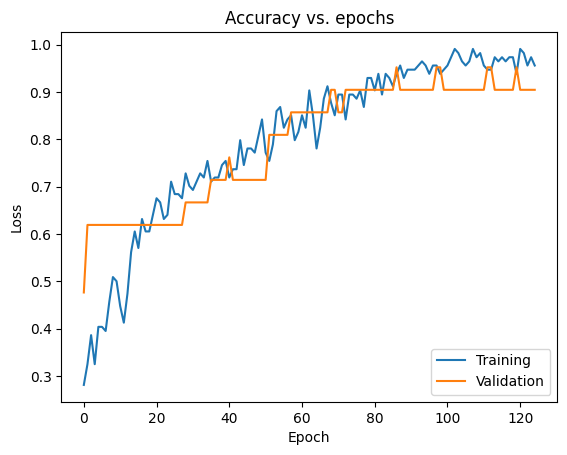

In [17]:

try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

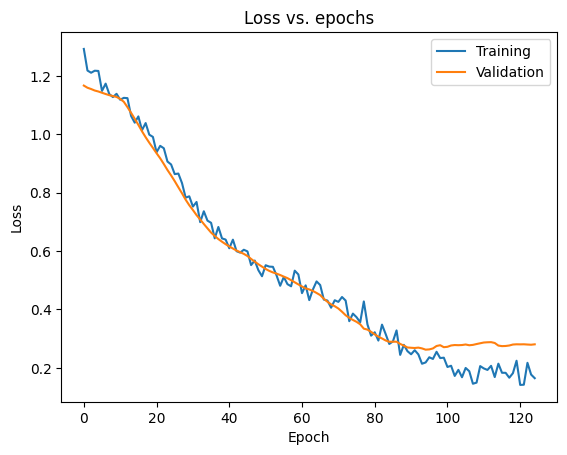

In [18]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [20]:
test_loss, test_acc = history.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.223
Test accuracy: 93.33%
